# Problem Set 4 - White Wine Quality Analysis
**Name**: Bongalos, Joshua Benedict B. |  Bachelor of Science in Computer Science

Introduction to Artificial Intelligence

This explores machine learning classification algorithms on the White Wine Quality dataset from UCI Machine Learning Repository. The goal is to predict white wine quality based on physicochemical properties.

## 1.1 Import Libraries and visualize the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
# Descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


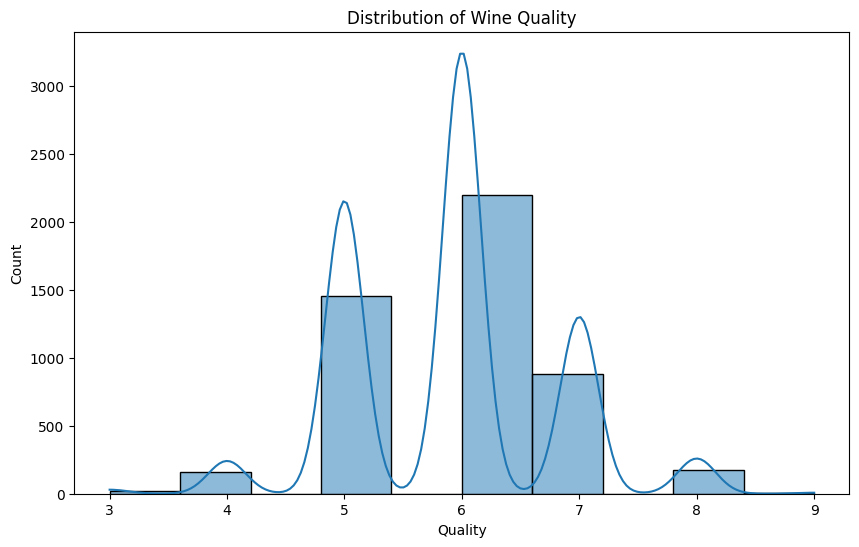

In [3]:
# Histogram of target variable 
plt.figure(figsize=(10,6))
sns.histplot(df['quality'], kde=True, bins=10)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

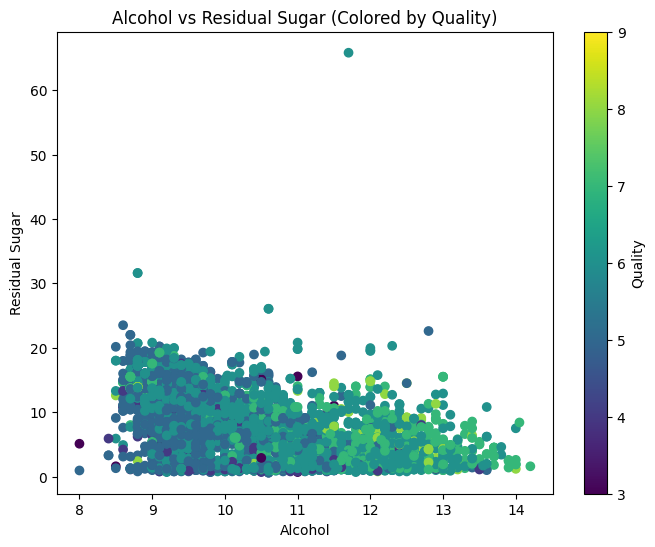

In [4]:
# Scatter plot example: Alcohol vs Residual Sugar
plt.figure(figsize=(8,6))
plt.scatter(df['alcohol'], df['residual sugar'], c=df['quality'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Residual Sugar')
plt.title('Alcohol vs Residual Sugar (Colored by Quality)')
plt.colorbar(label='Quality')
plt.show()

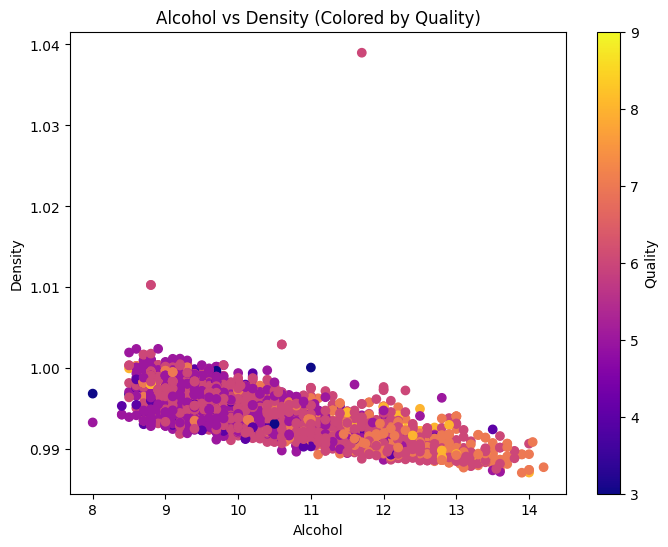

In [5]:
# Scatter plot example: Alcohol vs Density
plt.figure(figsize=(8,6))
plt.scatter(df['alcohol'], df['density'], c=df['quality'], cmap='plasma')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('Alcohol vs Density (Colored by Quality)')
plt.colorbar(label='Quality')
plt.show()

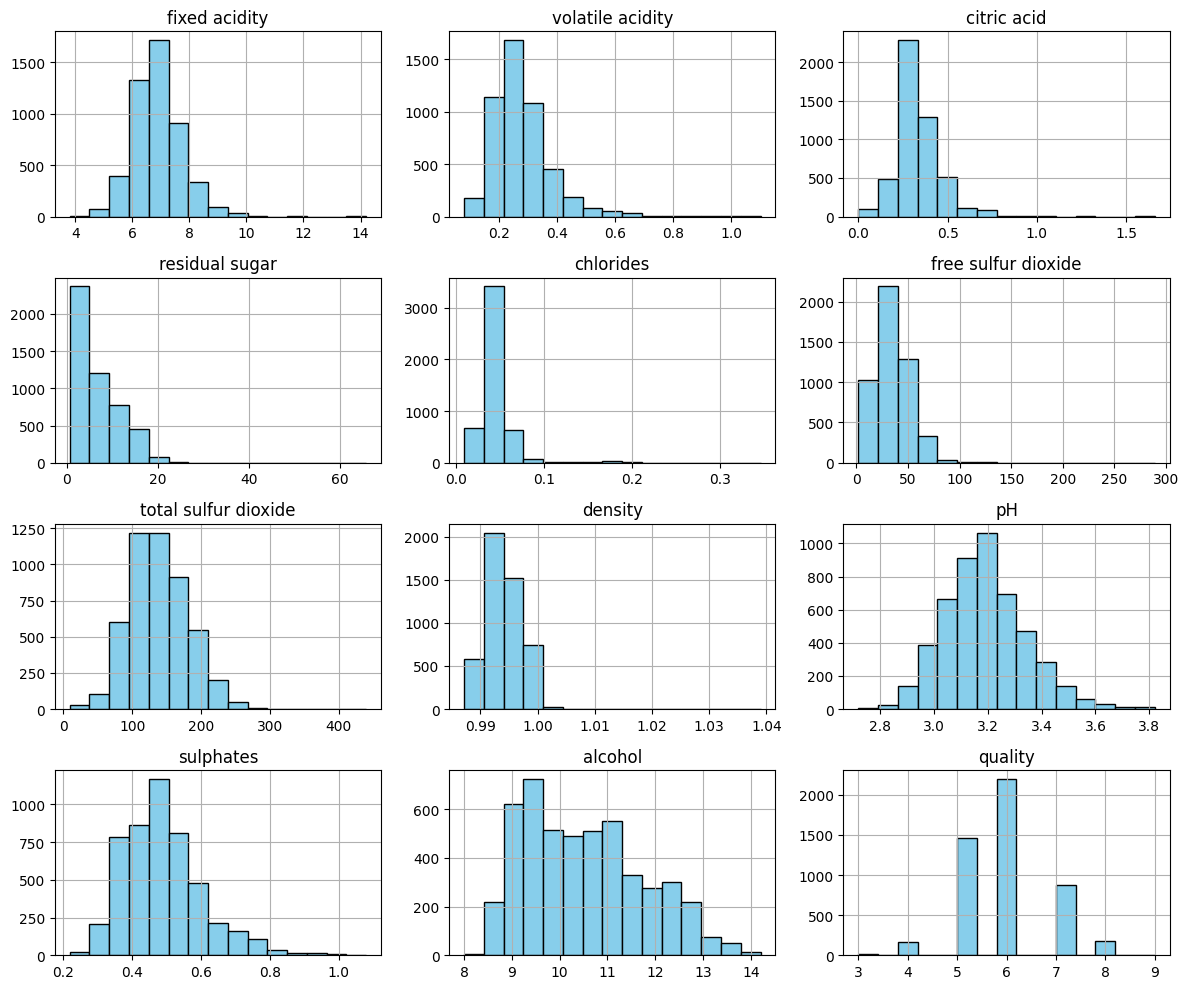

In [6]:
# Histogram for all numerical features
df.hist(figsize=(12,10), bins=15, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

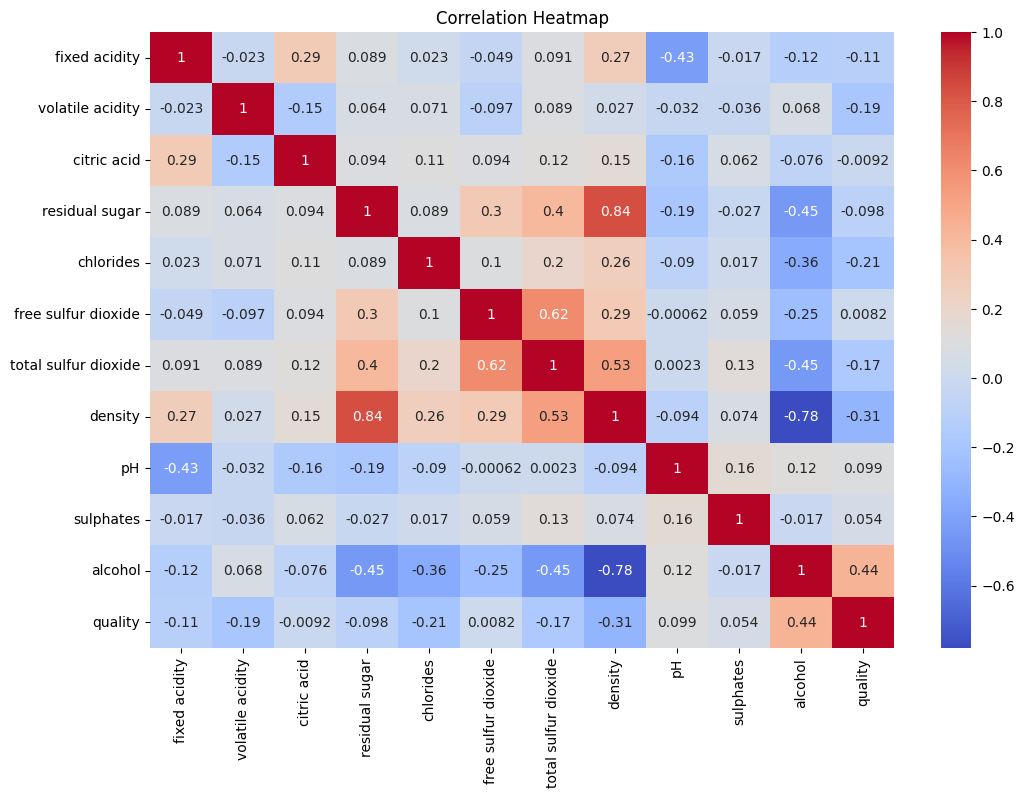

In [7]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 1.2 Machine Learning Classification

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [9]:
# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [10]:
# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.53


## 1.3 Confusion Matrix Visualization

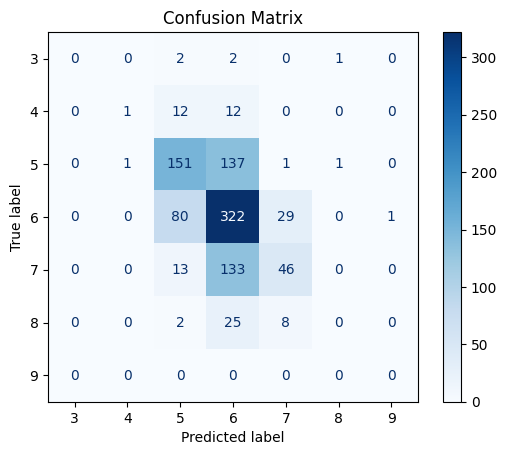

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
